In [34]:
import numpy as np
import pandas as pd
df = pd.read_csv('Titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [35]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [36]:
X=df.drop(['survived'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   name       1309 non-null   object 
 2   sex        1309 non-null   object 
 3   age        1046 non-null   float64
 4   sibsp      1309 non-null   float64
 5   parch      1309 non-null   float64
 6   ticket     1309 non-null   object 
 7   fare       1308 non-null   float64
 8   cabin      295 non-null    object 
 9   embarked   1307 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
dtypes: float64(6), object(7)
memory usage: 133.2+ KB


In [37]:
y=df['survived']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1310 entries, 0 to 1309
Series name: survived
Non-Null Count  Dtype  
--------------  -----  
1309 non-null   float64
dtypes: float64(1)
memory usage: 10.4 KB


In [38]:
cols = ['name', 'ticket', 'cabin', 'home.dest']
X.drop(cols, axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   sex       1309 non-null   object 
 2   age       1046 non-null   float64
 3   sibsp     1309 non-null   float64
 4   parch     1309 non-null   float64
 5   fare      1308 non-null   float64
 6   embarked  1307 non-null   object 
 7   boat      486 non-null    object 
 8   body      121 non-null    float64
dtypes: float64(6), object(3)
memory usage: 92.2+ KB


In [39]:
from sklearn.preprocessing import OneHotEncoder
cols = ['sex','embarked']
ohe = OneHotEncoder()
new_cols = ohe.fit_transform(X[cols]).toarray()
print(new_cols)

[[1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [40]:
print(ohe.get_feature_names_out(cols))

['sex_female' 'sex_male' 'sex_nan' 'embarked_C' 'embarked_Q' 'embarked_S'
 'embarked_nan']


In [41]:
# adding new columns to the dataset
cols2 = ohe.get_feature_names_out(cols)
X[cols2] = new_cols
X.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked,boat,body,sex_female,sex_male,sex_nan,embarked_C,embarked_Q,embarked_S,embarked_nan
0,1.0,female,29.0000,0.0,0.0,211.3375,S,2,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,male,0.9167,1.0,2.0,151.5500,S,11,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,female,2.0000,1.0,2.0,151.5500,S,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,male,30.0000,1.0,2.0,151.5500,S,NaN,135.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,female,25.0000,1.0,2.0,151.5500,S,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,male,48.0000,0.0,0.0,26.5500,S,3,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1.0,female,63.0000,1.0,0.0,77.9583,S,10,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,male,39.0000,0.0,0.0,0.0000,S,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,1.0,female,53.0000,2.0,0.0,51.4792,S,D,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,male,71.0000,0.0,0.0,49.5042,C,NaN,22.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [42]:
# removing original columns Sex and Embarked from dataset
X.drop(['sex','embarked'], axis='columns', inplace=True)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X['boat'])
X['boat'] = le.transform(X.boat)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        1309 non-null   float64
 1   age           1046 non-null   float64
 2   sibsp         1309 non-null   float64
 3   parch         1309 non-null   float64
 4   fare          1308 non-null   float64
 5   boat          1310 non-null   int32  
 6   body          121 non-null    float64
 7   sex_female    1310 non-null   float64
 8   sex_male      1310 non-null   float64
 9   sex_nan       1310 non-null   float64
 10  embarked_C    1310 non-null   float64
 11  embarked_Q    1310 non-null   float64
 12  embarked_S    1310 non-null   float64
 13  embarked_nan  1310 non-null   float64
dtypes: float64(13), int32(1)
memory usage: 138.3 KB


In [44]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [45]:
#Dropping body since it has the most missing values
X.drop(['body'], axis='columns', inplace=True)

In [46]:
#using option A to Replace with mean
#This option provides a reasonable estimation for numerical features without introducing bias into the data.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
imputer.fit_transform(X)

array([[ 1.    , 29.    ,  0.    , ...,  0.    ,  1.    ,  0.    ],
       [ 1.    ,  0.9167,  1.    , ...,  0.    ,  1.    ,  0.    ],
       [ 1.    ,  2.    ,  1.    , ...,  0.    ,  1.    ,  0.    ],
       ...,
       [ 3.    , 27.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 3.    , 29.    ,  0.    , ...,  0.    ,  1.    ,  0.    ],
       [ 3.    , 24.    ,  0.    , ...,  0.    ,  0.    ,  1.    ]])

In [47]:
#using option C for Replacing with most common value
#This option ensures that the most common category is used to replace missing values in categorical features.
imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
imputer.fit_transform(X)

array([[ 1.    , 29.    ,  0.    , ...,  0.    ,  1.    ,  0.    ],
       [ 1.    ,  0.9167,  1.    , ...,  0.    ,  1.    ,  0.    ],
       [ 1.    ,  2.    ,  1.    , ...,  0.    ,  1.    ,  0.    ],
       ...,
       [ 3.    , 27.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 3.    , 29.    ,  0.    , ...,  0.    ,  1.    ,  0.    ],
       [ 3.    , 24.    ,  0.    , ...,  0.    ,  0.    ,  1.    ]])

In [48]:
from sklearn.impute import SimpleImputer

# Using mean strategy for imputation, can change it to median or most_frequent if needed
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

In [52]:
X.isnull().sum()

pclass          0
age             0
sibsp           0
parch           0
fare            0
boat            0
sex_female      0
sex_male        0
sex_nan         0
embarked_C      0
embarked_Q      0
embarked_S      0
embarked_nan    0
dtype: int64

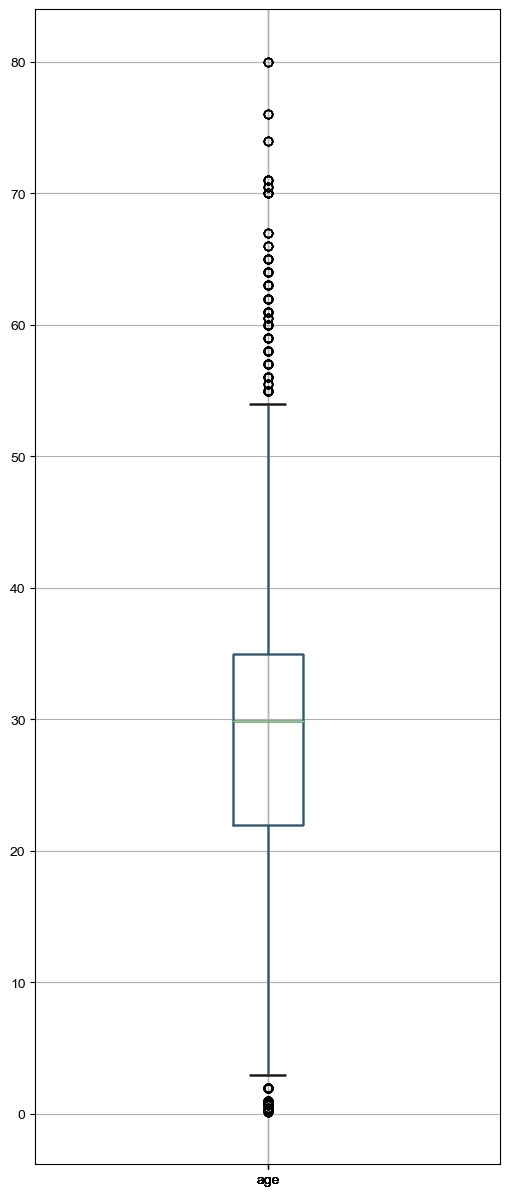

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
figure = X.boxplot(column="age", figsize=(6, 15))
plt.show()

In [55]:
X_new=X[X['age'] >70] #removes 4 outliers

In [56]:
# Step 7: Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
from sklearn.impute import SimpleImputer

print(y.isnull().sum())
y = y.dropna()
    
imputer = SimpleImputer(strategy='most_frequent')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))
y = pd.Series(y_imputed.ravel())

0


In [62]:
print("Number of NaN values in y before handling:", y.isnull().sum())
y = y.dropna()
X = X.iloc[y.index]

Number of NaN values in y before handling: 0


In [63]:
print("Number of NaN values in X after handling:", X.isnull().sum().sum())
print("Number of NaN values in y after handling:", y.isnull().sum())

Number of NaN values in X after handling: 0
Number of NaN values in y after handling: 0


In [64]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
selector= SelectKBest(chi2, k=5)
X_ = selector.fit(X, y)

cols_idxs = selector.get_support(indices=True)
X_new = X.iloc[:,cols_idxs]
X_new.head()

,pclass,fare,boat,sex_female,sex_male
0,1.0,211.3375,11.0,1.0,0.0
1,1.0,151.5500,2.0,0.0,1.0
2,1.0,151.5500,27.0,1.0,0.0
3,1.0,151.5500,27.0,0.0,1.0
4,1.0,151.5500,27.0,1.0,0.0


In [71]:
print(type(X['boat']))
print(X['boat'].shape)
print(np.reshape(X['boat'].tolist(), (-1,1)))

<class 'pandas.core.series.Series'>
(1309,)
[[11.]
 [ 2.]
 [27.]
 ...
 [27.]
 [27.]
 [27.]]


In [75]:
contingency_table = pd.crosstab(X_new['boat'], X_new['sex_female'])
print(contingency_table)

sex_female  0.0  1.0
boat                
0.0           3    2
1.0           5   24
2.0           7   18
3.0           2   17
4.0          14   25
5.0           2    0
6.0           1    0
7.0           8   25
8.0          24   13
9.0           0    1
10.0          2   21
11.0          3   10
12.0         13   13
13.0          5   26
14.0         13   14
15.0          1    1
16.0          1    0
17.0          2   18
18.0         12   11
19.0          0   23
20.0          0    1
21.0          9   16
22.0          9    2
23.0          9    0
24.0         14   24
25.0          1    1
26.0          7   13
27.0        676  147


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [79]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9580152671755725


In [80]:
# Neural Network model
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)

nn_predictions = nn_model.predict(X_test)

nn_accuracy = accuracy_score(y_test, nn_predictions)
print("Neural Network Accuracy:", nn_accuracy)

Neural Network Accuracy: 0.9122137404580153


C:\Users\yashv\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [81]:
# SVM model
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8893129770992366


In [82]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.9541984732824428


In [86]:
dt_accuracy = 0.9580152671755725
nn_accuracy = 0.9122137404580153
svm_accuracy = 0.8893129770992366
knn_accuracy = 0.9541984732824428

dt_accuracy_percent = dt_accuracy * 100
nn_accuracy_percent = nn_accuracy * 100
svm_accuracy_percent = svm_accuracy * 100
knn_accuracy_percent = knn_accuracy * 100

models = ["Decision Tree", "Neural Network", "SVM", "KNN"]
accuracies_percent = [dt_accuracy_percent, nn_accuracy_percent, svm_accuracy_percent, knn_accuracy_percent]

accuracy_dict = {"Model": models, "Accuracy (%)": accuracies_percent}

contingency_table = pd.DataFrame(accuracy_dict)

print(contingency_table)

            Model  Accuracy (%)
0   Decision Tree     95.801527
1  Neural Network     91.221374
2             SVM     88.931298
3             KNN     95.419847


In [ ]:
#The table displays the accuracy percentages of four different models 
#(Decision Tree, Neural Network, SVM, and KNN) in predicting survival on the Titanic dataset 
#after preprocessing. The Decision Tree model achieved the highest accuracy at 95.80%, 
#followed by KNN at 95.42%, Neural Network at 91.22%, and SVM at 88.93%. These accuracy percentages represent 
#the proportion of correct predictions made by each model, indicating their respective performance levels in the 
#classification task.